In [2]:
import numpy as np, pandas as pd, seaborn as sb
import os, sys

In [7]:
import csv
import requests
import shutil
import datetime

#req = requests.get('https://d3c33hcgiwev3.cloudfront.net/vYgegoZ8S9OIHoKGfNvTOw_46ead4e4f3bf4757b22fa2d817b3ff2d_Human_Activity_Recognition_Using_Smartphones_Data.csv?Expires=1634774400&Signature=fpbtBZqicRx6uzJJsngS4p0bOiZ462MI~H962lTvbGAL19GJ2u7xVdrROWCRtjpEQuYB-O5OI-YFvk7dHccszeIuTLvOy8SWcuSgSGlvAgjXQi4eGrfYruJioj0lJnaB9tPzBvIW9QEHajCL-qSa~dEyj67fWASVpFM8LOEkExQ_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A', stream=True)
#url_content = req.content
#if req.status_code == 200:
#    print(req.status_code == requests.codes.ok)
#    print(requests.Response.content)
#    csv_file = open('Human_Activity_Recognition_Using_Smartphones_Data.csv', 'wb')
#    csv_file.write(url_content)
#    csv_file.close()

In [8]:
datas = pd.read_csv('Desktop/datas/Human_Activity_Recognition_Using_Smartphones_Data.csv', sep=',')
datas.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [9]:
datas.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [10]:
datas.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

In [14]:
datas['Activity'].value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

### Check the scaling for min-max values

In [15]:
(datas.iloc[:, :-1].min().value_counts(),datas.iloc[:, :-1].max().value_counts())

(-1.0    561
 dtype: int64,
 1.0    561
 dtype: int64)

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
datas['Activity'] = le.fit_transform(datas.Activity)
datas['Activity'].sample(5)

3748    3
9936    2
8645    3
6423    4
7005    1
Name: Activity, dtype: int64

In [33]:
feature_cols = datas.columns[:-1]
corr_values = datas[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
              .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [34]:
corr_values

,feature1,feature2,correlation,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302,0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785,0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071,0.036071
...,...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582,0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549,0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249,0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231,0.635231


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

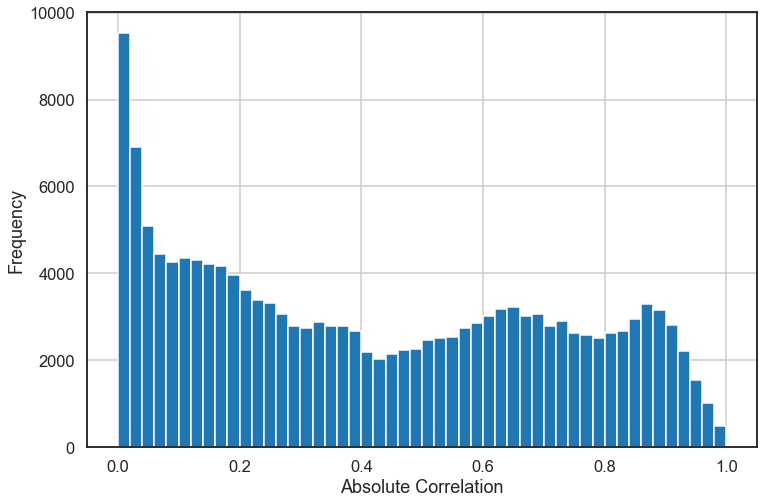

In [36]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [48]:
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


In [40]:
corr_values.shape

(157080, 4)

### I split the data in train and test but I use the method of StratifiedShuffleSplit to maintain the same ratio of predictor classes

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuf_split = StratifiedShuffleSplit(n_splits = 1,
                                          test_size = 0.3,
                                          random_state = 42)

train_idx, test_idx = next(strat_shuf_split.split(datas[feature_cols], datas.Activity))

X_train = datas.loc[train_idx, feature_cols]
y_train = datas.loc[train_idx, 'Activity']

X_test = datas.loc[test_idx, feature_cols]
y_test = datas.loc[test_idx, 'Activity']

In [52]:
(y_train.value_counts(), y_test.value_counts())

(0    1361
 2    1334
 1    1244
 3    1205
 5    1081
 4     984
 Name: Activity, dtype: int64,
 0    583
 2    572
 1    533
 3    517
 5    463
 4    422
 Name: Activity, dtype: int64)

In [54]:
y_train.value_counts(normalize = True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [55]:
y_test.value_counts(normalize = True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

## I fit the logistic regression model

In [56]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [59]:
# This step is for cross validation

from sklearn.linear_model import LogisticRegressionCV

lr_l1 = LogisticRegressionCV(Cs = 10, cv = 4, penalty = 'l1', solver = 'liblinear')
lr_l1.fit(X_train, y_train)

lr_l2 = LogisticRegressionCV(Cs = 10, cv = 4, penalty = 'l2', solver = 'liblinear')
lr_l2.fit(X_train, y_train)

LogisticRegressionCV(cv=4, solver='liblinear')

### Here I compare the magnitudes of coefficients for each model

In [68]:
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab, mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels = [[lab], [0,1,2,3,4,5]],
                               codes = [[0,0,0,0,0,0], [0,1,2,3,4,5]])
    
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))
    
coefficients = pd.concat(coefficients, axis = 1)

coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
235  0.046319 -0.667863  0.722678  0.033681  0.046989 -0.164623  0.000000   
239 -0.001301  0.111786 -0.765764 -0.289882  0.250241  0.345581  0.000000   
479  0.000122  0.203856  0.235880  0.049454  0.324774  0.105424  0.000000   
263 -0.002592 -0.192229  0.205898  0.763553 -0.376343 -0.541878  0.000000   
496 -0.026256  0.038503  0.214899  0.001144 -0.055611  0.109863 -0.024626   
157 -0.389468 -0.488883  0.632478 -1.283650  0.111285  2.195275 -1.362463   
111  0.011999  0.596054 -0.697590  0.034307 -0.245618 -0.413427  0.000000   
152 -0.173063 -0.142732  0.325227  0.174731  0.325346 -0.825249 -0.409090   
537  0.041935  0.217774 -0.302268  1.183666 -0.416872 -0.142686  0.000000   
154  0.005872  0.140867 -0.182126  0.085222  0.534637 -0.133080  0.000000   

                                                             l2            \
            1         2         3         4         5         0         1   
235 -1.754508  1.749344  0.000000  0.000000 -1.474530  0.049039 -1.650378   
239  0.000000 -2.467861 -0.515306  0.922298  0.744116  0.029979  1.737468   
479  0.000000  0.099766  0.000000  0.372782  0.253543 -0.021071  0.541927   
263  0.000000  0.217364  3.133665 -0.344946 -1.242058 -0.055488  0.335952   
496  0.000000  0.000000  0.000000  0.000000  0.355342 -0.053952  0.039872   
157 -0.736722  0.658051 -3.384744 -0.202572  7.418986 -0.893983 -0.986430   
111  2.385380 -3.094075 -0.019913 -0.649512 -3.639235  0.077131  4.681451   
152  0.000000  0.000000  1.132311  1.300300 -5.369075 -0.354400  0.377771   
537  0.469061 -0.237951  1.087726 -0.180532  0.158366  0.074877  0.622914   
154  0.000000  0.000000  0.000000  0.925773 -1.606588  0.059250  0.325602   

                                             
            2         3         4         5  
235  1.100437  0.145544  0.484635 -1.070320  
239 -1.247001 -0.614901  1.199043  1.229436  
479  0.287565  0.121198  1.257888  0.315222  
263  0.211065  2.338777 -1.008009 -2.264922  
496  0.349772  0.069493 -0.158146  0.068500  
157  0.731943 -3.297735 -0.127052  9.032213  
111 -1.308104  0.080952 -0.858435 -1.920370  
152  0.356502  0.266735  1.520608 -3.681080  
537 -0.665272  2.556036 -1.838869 -0.313687  
154 -0.129770  0.067355  1.974635 -0.337848

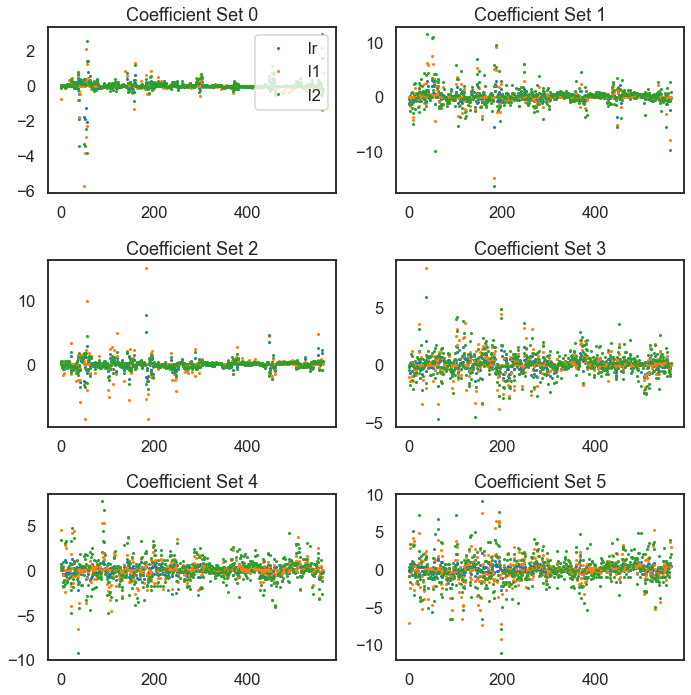

In [64]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for loc, ax in enumerate(axList):#
    data = coefficients.xs(loc, level = 1, axis = 1)
    data.plot(marker = 'o', ls = '', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=1)
        
    ax.set(title = 'Coefficient Set ' + str(loc))
    
plt.tight_layout()

In [72]:
coefficients.iloc[:,:].min().value_counts(), coefficients.iloc[:,:].max().value_counts()

(-1.884715     1
 -11.072967    1
 -4.747122     1
 -16.328292    1
 -9.199562     1
 -2.237482     1
 -14.928591    1
 -5.752231     1
 -3.849386     1
 -2.709340     1
 -8.618994     1
 -3.886416     1
 -9.190022     1
 -5.502324     1
 -6.570842     1
 -2.114083     1
 -2.801162     1
 -3.825750     1
 dtype: int64,
 2.195275     1
 7.418986     1
 2.981074     1
 7.845789     1
 5.088181     1
 2.031151     1
 8.444907     1
 9.218231     1
 2.102983     1
 15.211879    1
 9.032213     1
 1.599105     1
 5.895379     1
 7.727141     1
 11.470663    1
 2.171736     1
 5.339864     1
 2.949029     1
 dtype: int64)

### I will predict the class for each model

In [79]:
y_pred, y_prob = [], []

coeff_labels = ['lr', 'l1','l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab, mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    coeff_label = pd.MultiIndex(levels = [[lab], [0,1,2,3,4,5]],
                               codes = [[0,0,0,0,0,0], [0,1,2,3,4,5]])
    
    y_prob.append(pd.DataFrame(mod.predict_proba(X_test), columns=coeff_label))

y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

In [77]:
y_pred

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0
...,...,...,...
3085,2,2,2
3086,3,3,3
3087,1,1,1
3088,1,1,1


In [78]:
y_prob.head()

lr                                                                    \
          0             1             2             3         4             5   
0  0.000034  1.683473e-04  5.675977e-04  9.989388e-01  0.000006  2.845350e-04   
1  0.000037  3.211745e-07  4.237873e-06  1.424997e-04  0.011650  9.881654e-01   
2  0.000036  4.352809e-03  2.962612e-06  9.875917e-01  0.005011  3.006541e-03   
3  0.000223  9.813812e-01  1.838387e-02  1.419679e-07  0.000012  1.288313e-12   
4  0.998277  1.717724e-03  3.008377e-09  2.088838e-07  0.000005  1.393958e-10   

         l1                                                          \
          0             1             2             3             4   
0  0.000029  6.058667e-06  1.030299e-03  9.989351e-01  5.192034e-10   
1  0.000020  1.155580e-08  1.178478e-07  6.588093e-07  2.834679e-04   
2  0.000003  3.411718e-03  2.321789e-07  9.958833e-01  7.017692e-04   
3  0.000003  9.991801e-01  8.171064e-04  2.835946e-14  2.691065e-10   
4  0.999921  7.911020e-05  2.628335e-14  8.515731e-14  3.694345e-11   

                           l2                                            \
              5             0             1             2             3   
0  3.481670e-09  1.236526e-07  1.949515e-08  2.425381e-04  9.997573e-01   
1  9.996953e-01  2.672496e-07  5.210562e-14  1.394542e-07  1.037654e-09   
2  3.770087e-07  1.838627e-07  6.956577e-05  1.415799e-07  9.999297e-01   
3  6.727188e-27  1.315072e-07  9.943383e-01  5.661592e-03  9.019530e-17   
4  3.067520e-23  9.999974e-01  2.600992e-06  5.060137e-12  9.946948e-16   

                               
              4             5  
0  1.588559e-15  3.600931e-12  
1  1.149785e-06  9.999984e-01  
2  3.860520e-07  2.273170e-09  
3  3.986648e-16  1.010223e-38  
4  6.445415e-16  2.987487e-34

In [82]:
pd.DataFrame(lr.predict_proba(X_test)).head()

,0,1,2,3,4,5
0,0.000029,6.058667e-06,1.030299e-03,9.989351e-01,5.192034e-10,3.481670e-09
1,0.000020,1.155580e-08,1.178478e-07,6.588093e-07,2.834679e-04,9.996953e-01
2,0.000003,3.411718e-03,2.321789e-07,9.958833e-01,7.017692e-04,3.770087e-07
3,0.000003,9.991801e-01,8.171064e-04,2.835946e-14,2.691065e-10,6.727188e-27
4,0.999921,7.911020e-05,2.628335e-14,8.515731e-14,3.694345e-11,3.067520e-23


In [83]:
pd.DataFrame(lr_l1.predict_proba(X_test)).head()

,0,1,2,3,4,5
0,0.000029,6.058667e-06,1.030299e-03,9.989351e-01,5.192034e-10,3.481670e-09
1,0.000020,1.155580e-08,1.178478e-07,6.588093e-07,2.834679e-04,9.996953e-01
2,0.000003,3.411718e-03,2.321789e-07,9.958833e-01,7.017692e-04,3.770087e-07
3,0.000003,9.991801e-01,8.171064e-04,2.835946e-14,2.691065e-10,6.727188e-27
4,0.999921,7.911020e-05,2.628335e-14,8.515731e-14,3.694345e-11,3.067520e-23


### I check confusion matrix and some specific metrics: accuracy, precision, recall, score

In [87]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

In [90]:
pd.DataFrame(score(y_test, y_pred['lr']))

,0,1,2,3,4,5
0,1.0,0.958801,0.963222,0.996132,0.995261,0.99568
1,1.0,0.960600,0.961538,0.996132,0.995261,0.99568
2,1.0,0.959700,0.962380,0.996132,0.995261,0.99568
3,583.0,533.000000,572.000000,517.000000,422.000000,463.00000


In [111]:
metrics, conf_matrix = [], []

for lab in coeff_labels:
    
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    auc = roc_auc_score(label_binarize(y_test, classes = [0,1,2,3,4,5]),
                        y_prob[lab],
                        average = 'weighted')
    
    conf_matrix.append(confusion_matrix(y_test, y_pred[lab]))
    
    metrics.append(pd.Series({'precision': precision,
                              'recall': recall,
                              'fscore': fscore,
                              'accuracy': accuracy,
                              'auc': auc}, name=lab))

metrics = pd.concat(metrics, axis=1)

In [95]:
metrics

,lr,l1,l2
precision,0.984144,0.983835,0.984148
recall,0.984142,0.983819,0.984142
fscore,0.984143,0.983815,0.984143
accuracy,0.984142,0.983819,0.984142
auc,0.999338,0.999359,0.999250


In [112]:
conf_matrix

[array([[583,   0,   0,   0,   0,   0],
        [  0, 512,  21,   0,   0,   0],
        [  0,  22, 550,   0,   0,   0],
        [  0,   0,   0, 515,   1,   1],
        [  0,   0,   0,   1, 420,   1],
        [  0,   0,   0,   1,   1, 461]]),
 array([[583,   0,   0,   0,   0,   0],
        [  0, 506,  27,   0,   0,   0],
        [  0,  21, 551,   0,   0,   0],
        [  0,   0,   0, 517,   0,   0],
        [  0,   0,   0,   0, 422,   0],
        [  0,   0,   0,   2,   0, 461]]),
 array([[583,   0,   0,   0,   0,   0],
        [  0, 510,  23,   0,   0,   0],
        [  0,  23, 549,   0,   0,   0],
        [  0,   0,   0, 517,   0,   0],
        [  0,   0,   0,   1, 421,   0],
        [  0,   0,   0,   2,   0, 461]])]

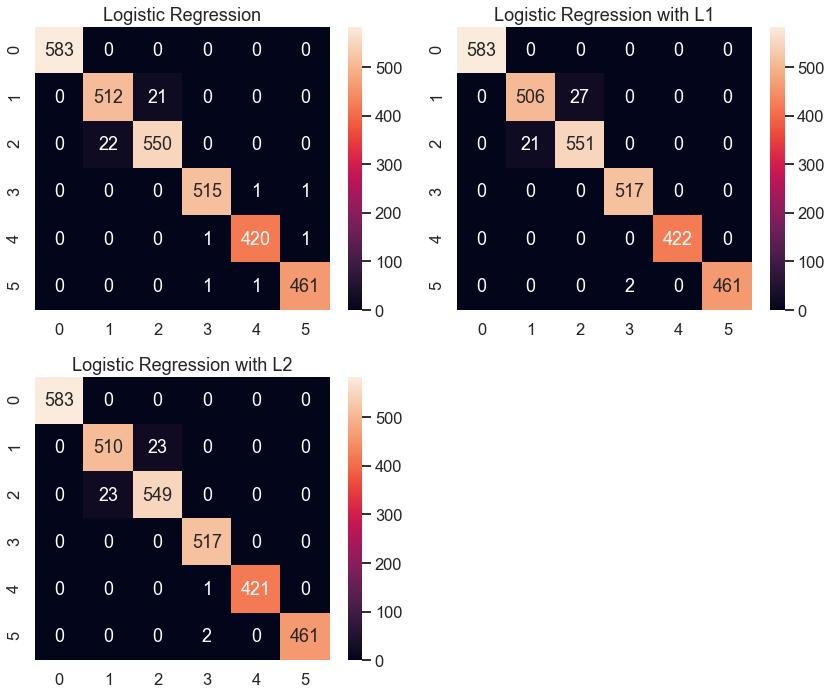

In [127]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches([12,10])

axList[-1].axis('off')

sns.heatmap(conf_matrix[0], ax = axList[0], annot=True, fmt='d')
axList[0].set(title='Logistic Regression')

sns.heatmap(conf_matrix[1], ax = axList[1], annot=True, fmt='d')
axList[1].set(title='Logistic Regression with L1')

sns.heatmap(conf_matrix[2], ax = axList[2], annot=True, fmt='d')
axList[2].set(title='Logistic Regression with L2')

plt.tight_layout()